<a href="https://colab.research.google.com/github/Tydos/Interpretable-ML-Models/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

This notebook implements linear regression using the popular diabetes dataset used for regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
X = load_diabetes().data
y = load_diabetes().target
cols = load_diabetes().feature_names

print(X[1],y[1],cols)

[-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06833155 -0.09220405] 75.0 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# print(len(X_train))
# print(len(X_test))

353
89


We have to predict y = w*x+b

10 features -> 10 weights, 10 biases

### Closed form solution

Closed-form solutions are best suited for problems with a small number of features. The dominant computational cost comes from inverting the feature covariance matrix, which has o(n^3) complexity in the number of features and therefore does not scale well to high-dimensional datasets.

In [4]:
#closed form solution - this one passes through origin
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def normal_bias_equation(X,y):
  #add bias using numpy column concat function
  len_features = X.shape[0]
  bias = np.ones((len_features,1)) #create matrix of size 1*n
  X_b = np.c_[bias,X]

  theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
  return theta

def lstsq_normal(X,y):
  len_features = X.shape[0]
  bias = np.ones((len_features,1)) #create matrix of size 1*n
  X_b = np.c_[bias,X]

  return np.linalg.lstsq(X_b,y,rcond=None)


In [5]:
w = normal_equation(X_train,y_train)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")

age: 17.87051788953863
sex: -351.9090487015162
bmi: 578.1719594437396
bp: 353.8176418327986
s1: -1557.83827551855
s2: 1357.312800480347
s3: 235.11863690465267
s4: 51.03197503890407
s5: 1085.7754019438291
s6: -17.193335048620153


In [6]:
w = normal_bias_equation(X_train,y_train)
print(w)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")


[  150.59746241   -27.70185374  -239.73875349   537.37848382
   326.96996902 -1030.74497707   628.73874525   212.8178961
   276.8890007    785.14295696    56.44968287]
age: 150.5974624110517
sex: -27.701853742619996
bmi: -239.73875348515975
bp: 537.3784838223077
s1: 326.9699690178383
s2: -1030.7449770704225
s3: 628.7387452533989
s4: 212.81789609680524
s5: 276.88900070006355
s6: 785.1429569575309


In [7]:
w, residual, rank, s = lstsq_normal(X_train,y_train)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")

print(residual)
print(rank)
print(s)


age: 150.59746241105216
sex: -27.70185374262053
bmi: -239.7387534851618
bp: 537.3784838223054
s1: 326.96996901783746
s2: -1030.744977070403
s3: 628.7387452533821
s4: 212.81789609679237
s5: 276.88900070005695
s6: 785.1429569575284
[1018162.99800541]
11
[18.78851434  1.79773805  1.09952416  0.9839162   0.86936419  0.74009403
  0.68126962  0.65007584  0.58646928  0.24528905  0.07763364]


### Gradient descent solution


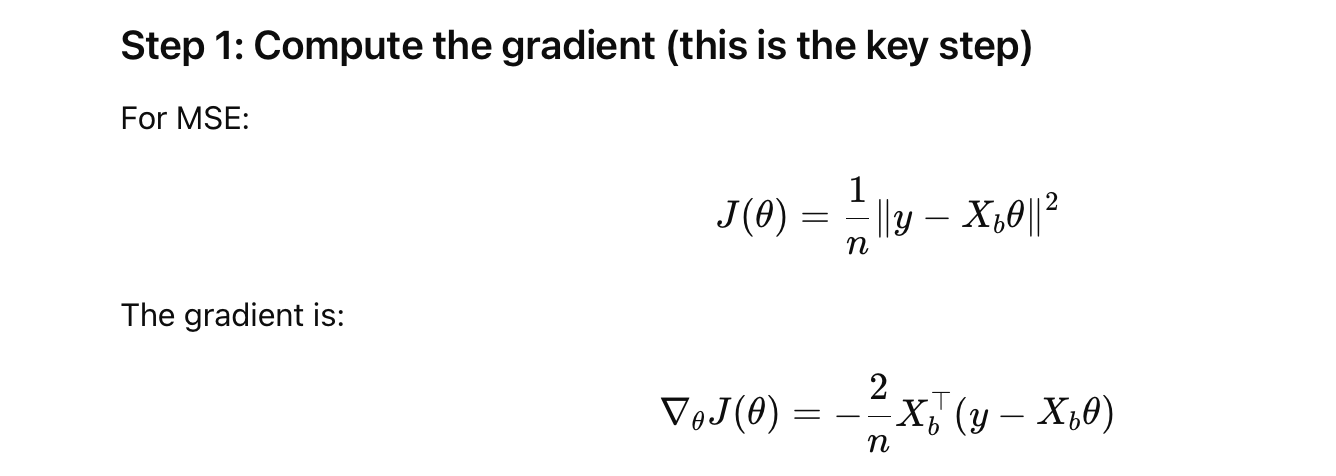

#### Bias

In [8]:
#TODO
def add_bias(X):
    n_samples = X.shape[0]
    return np.hstack((np.ones((n_samples, 1)), X))

X_b = add_bias(X_train)
print(X_b[0])

print(X_train.shape)
print(X_b.shape)
print(ytrain.shape)
print(y_test.shape)

[ 1.00000000e+00 -7.81653240e-02 -4.46416365e-02 -1.69840749e-02
 -1.25561242e-02 -1.93006962e-04 -1.35266674e-02  7.07299263e-02
 -3.94933829e-02 -4.11761669e-02 -9.22040496e-02]
(353, 10)
(353, 11)
(353,)
(89,)


#### Mean Squared Error Loss

In [9]:
#create a weight vector so that i can do wTx
weight_vector = np.ones(X_b.shape[1])
print(weight_vector)

def mse_loss(X_b,y,w):
  Y_hat = X_b @ weight_vector
  return np.mean((y-Y_hat)**2)

loss = mse_loss(X_b,ytrain,weight_vector)
print(weight_vector)
print(loss)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
28836.785450576896


#### Gradient Descent

w <- w - learning_rate*gradient

In [10]:
def gradient(X_b,y,w):
    n = len(y)
    return -(2 / n) * X_b.T @ (y - X_b @ w)

gradient(X_b,ytrain,weight_vector)

array([-3.03146703e+02, -1.62497513e+00, -1.10031371e-01, -4.72985712e+00,
       -3.44651323e+00, -2.06233168e+00, -2.00295320e+00,  3.12521528e+00,
       -3.61366719e+00, -4.25628672e+00, -2.98607636e+00])

epoch - 0 : Loss -27926.04812620778
epoch - 1 : Loss -27051.347771848137
epoch - 2 : Loss -26211.257299761866
epoch - 3 : Loss -25404.40613619465
epoch - 4 : Loss -24629.477983368408
epoch - 5 : Loss -23885.208670102737
epoch - 6 : Loss -23170.384087553808
epoch - 7 : Loss -22483.838206699835
epoch - 8 : Loss -21824.451174335987
epoch - 9 : Loss -21191.147484469584
epoch - 10 : Loss -20582.894222129813
epoch - 11 : Loss -19998.69937672411
epoch - 12 : Loss -19437.610222187235
epoch - 13 : Loss -18898.711761277886
epoch - 14 : Loss -18381.12523148264
epoch - 15 : Loss -17884.006670087445
epoch - 16 : Loss -17406.545536073587
epoch - 17 : Loss -16947.96338658789
epoch - 18 : Loss -16507.512605825836
epoch - 19 : Loss -16084.475184252175
epoch - 20 : Loss -15678.16154616543
epoch - 21 : Loss -15287.909423691995
epoch - 22 : Loss -14913.08277537105
epoch - 23 : Loss -14553.070747564523
epoch - 24 : Loss -14207.286676996206
epoch - 25 : Loss -13875.167132791179
epoch - 26 : Loss -13556.1709

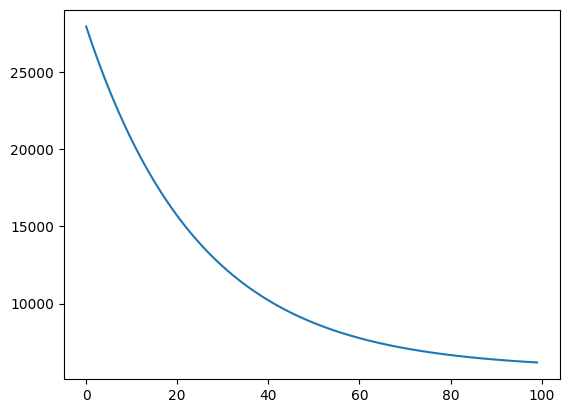

In [11]:
learning_rate = 0.01
epochs = 100
loss_history = {}

#initialize weight vector
weight_vector = np.ones(X_b.shape[1])
for epoch in range(epochs):
  #find gradient for the current set of weights
  grad = gradient(X_b,ytrain,weight_vector)

  #update weights using the gradient descent algorithm
  weight_vector -= learning_rate * grad

  #find out the loss of the model
  loss = mse_loss(X_b,ytrain,weight_vector)
  print(f"epoch - {epoch} : Loss -{loss}")

  loss_history[epoch] = loss

print(weight_vector)
plt.plot(loss_history.keys(),loss_history.values())

### Cross Validation

In [35]:
from typing import Tuple, Dict

In [36]:
X = load_diabetes().data
y = load_diabetes().target
cols = load_diabetes().feature_names

In [37]:
print(X.shape)
print(y.shape)
print(cols)

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [55]:
def train_test_split(X:np.ndarray,
                     y:np.ndarray,
                     test_size:float=0.2,
                     random_state:int=42) -> tuple[np.ndarray,np.ndarray,np.ndarray, np.ndarray]:

  if(len(X)!=len(y)):
    raise ValueError("X and y must have the same length")
  if(test_size < 0 or test_size > 1):
    raise ValueError("test_size must be between 0 and 1")


  if random_state is not None:
    np.random.seed(random_state)

  n_samples = X.shape[0]
  n_test = int(test_size*n_samples)
  indices = np.random.permutation(n_samples)

  test_indices = indices[:n_test]
  train_indices = indices[n_test:]

  X_train = X[train_indices]
  y_train = y[train_indices]
  X_test = X[test_indices]
  y_test = y[test_indices]

  return X_train,y_train,X_test,y_test

X_train,y_train,X_test,y_test = train_test_split(X,y)
print(len(X_train))
print(len(X_test))

354
88


In [51]:
def generate_folds(X,k,shuffle=False):
  data_indices = np.arange(len(X)) # [0..n] np array -> can be shuffled and split easily

  if shuffle:
    data_indices = np.random.permutation(data_indices)

  folds = np.array_split(data_indices,k)
  return folds

k=5
folds = generate_folds(X_train,k)
print("Length: ",len(X_train))
for i in range(k):
  print(f"fold {i} -> shape: {X_fold[i].shape}")

Length:  354
fold 0 -> shape: (70, 10)
fold 1 -> shape: (70, 10)
fold 2 -> shape: (70, 10)
fold 3 -> shape: (70, 10)
fold 4 -> shape: (70, 10)


In [40]:
def add_bias(X):
    n_samples = X.shape[0]
    return np.hstack((np.ones((n_samples, 1)), X))

weight_vector = np.ones(X_b.shape[1])
def mse_loss(X_b,y,w):
  Y_hat = X_b @ weight_vector
  return np.mean((y-Y_hat)**2)

def gradient(X_b,y,w):
    n = len(y)
    return -(2 / n) * X_b.T @ (y - X_b @ w)

In [41]:
def cross_validation(X,y,X_fold,y_fold,k):
  fold_size = int(len(X)/k)
  for i in range(k):
    X_val = X_fold[i]
    y_val = y_fold[i]
#TODO



### Analysis

Closed Form Solution - [ 150.88647755  -11.61497375 -268.29146279  559.69376371  322.53768282
 -795.60655188  529.01812587   -5.01124071   83.45285492  745.74283664
   66.85271858]


Gradient Descent Solution - [131.98416514   2.36476678   1.15594451   5.80977315   4.33169799
   2.66622582   2.45844696  -2.15647581   4.5045422    5.15368472
   4.09745983]


### Assumptions of Linear Regression


---
### 1. Linearity (in parameters)
**Intuition:**  
Each feature contributes additively and proportionally to the prediction.

**Violation symptoms:**  
- Residuals vs. predicted values show curved patterns  
- Systematic under- or over-prediction in certain ranges  

**Fixes:**  
- Add polynomial or interaction terms  
- Transform features (log, square root, etc.)  
- Use a non-linear model if necessary  
---

### 3. Homoscedasticity (constant error variance)
**Intuition:**  
The model should be equally confident across all prediction ranges.

**Violation symptoms:**  
- Residual plot shows a fan or cone shape  
- Errors increase with the magnitude of predictions  

**Fixes:**  
- Transform the target variable (log, Box–Cox)  
- Use weighted least squares  
- Apply heteroscedasticity-robust standard errors  

---

### 4. Normality of errors (mainly for inference)
**Intuition:**  
Normally distributed errors allow reliable confidence intervals and hypothesis tests.

**Violation symptoms:**  
- Skewed or heavy-tailed residual distribution  
- Strong deviations from the diagonal in a Q–Q plot  

**Fixes:**  
- Transform the target variable  
- Use bootstrapping methods  
- Often ignorable for prediction with large sample sizes  

---

### 5. No (or low) multicollinearity
**Intuition:**  
Each feature should explain unique information about the target.

**Violation symptoms:**  
- Large standard errors for coefficients  
- Unstable coefficients or unexpected sign changes  
- High Variance Inflation Factor (VIF)  

**Fixes:**  
- Remove or combine correlated features  
- Apply dimensionality reduction (e.g., PCA)  
- Use regularization techniques (Ridge, Lasso)  



# Data Analysis

### Feature–Target Linearity Diagnostics

This visualization assesses the **linearity assumption** of linear regression by plotting each feature against the target variable with an overlaid linear fit.

#### Method
- Each subplot displays one feature versus the target.
- A scatter plot shows the raw relationship.
- A fitted linear regression line highlights the linear trend.

#### Interpretation
- **Approximately straight trend** → Linear relationship is plausible.
- **Clear curvature** → Indicates non-linearity; consider transformations or polynomial terms.
- **Flat or noisy pattern** → Feature may have weak explanatory power.
- **Uneven spread of points** → May suggest heteroscedasticity.

#### Purpose
These plots provide a **feature-level diagnostic** to identify non-linear relationships before or during model specification and complement residual-based diagnostics.


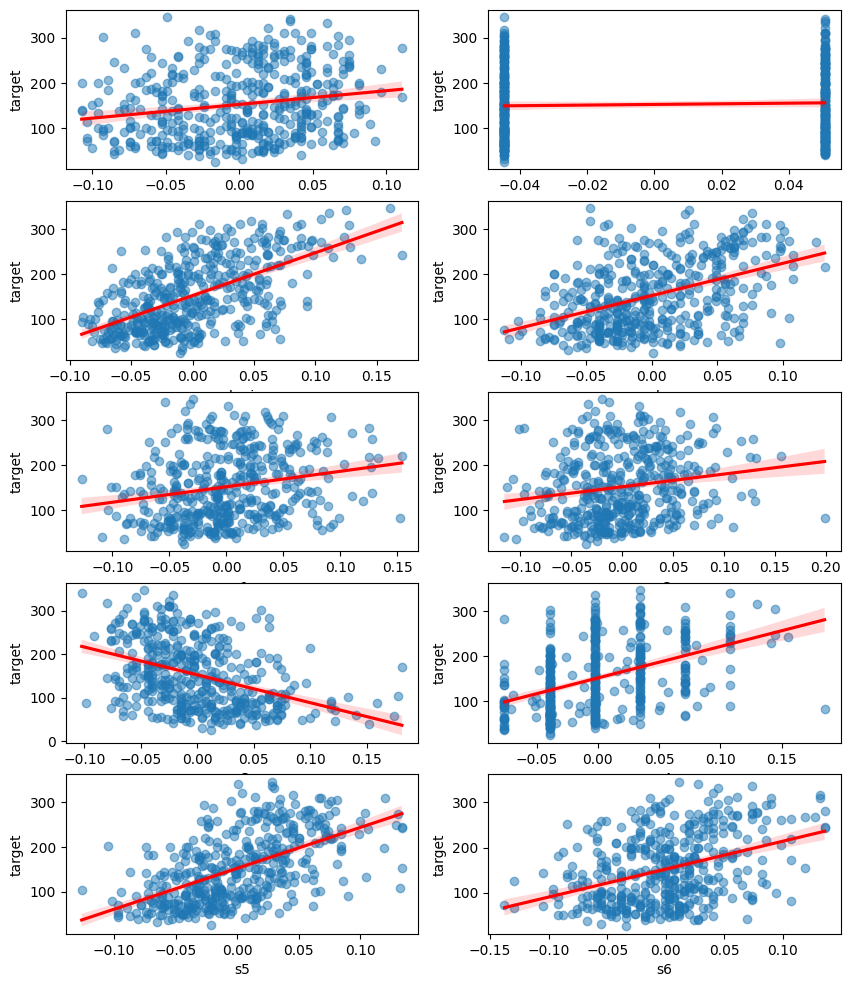

In [27]:
#for each feature, plot feature vs target to check for linearity
df = pd.DataFrame(X,columns=cols)
df['target'] = y

fig, axes = plt.subplots(5, 2, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
  plt.subplot(5,2,i+1)
  sns.regplot(x=df[col],y=df['target'],ax=axes[i],scatter_kws={'alpha':0.5},line_kws={'color':'red'})

plt.show()


### Residual Diagnostics: Linearity and Homoscedasticity

This code fits a linear regression model and evaluates key assumptions using a **residuals vs. predicted values** plot.

- **Linearity**  
  Residuals should be randomly scattered around zero with no systematic pattern. Curvature or structure suggests non-linear relationships or missing terms.

- **Homoscedasticity**  
  The spread of residuals should remain approximately constant across all predicted values. A funnel or cone shape indicates heteroscedasticity.

**Desired outcome:**  
A horizontal band of points centered at zero with uniform spread across the x-axis.

This plot serves as an initial diagnostic; additional feature-level residual plots and formal statistical tests may be used for confirmation.


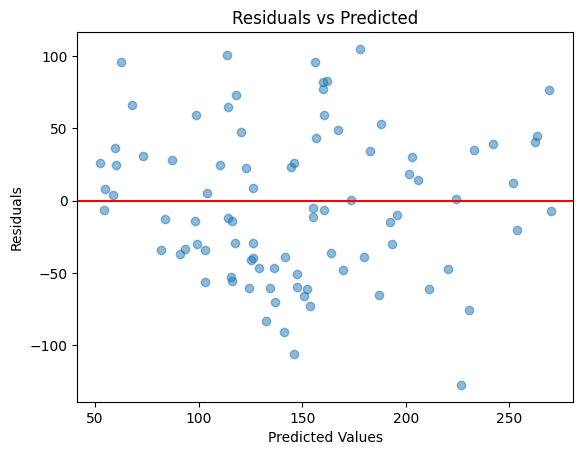

In [29]:
#check residual plots for linearity, homoscedascity
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


### Statistical Testing

#### Ramsey RESET Test

**Purpose**  
Tests whether non-linear combinations of the fitted values add explanatory power to the model.

**Hypotheses**  
- **H₀**: The model is correctly specified (linear)
- **H₁**: The model is misspecified (non-linear terms are missing)

**Interpretation**  
- **p-value < 0.05** → Evidence of non-linearity  
- **p-value ≥ 0.05** → Linearity assumption is plausible


In [30]:
#Ramsey Reset
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

X_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_).fit()

reset = linear_reset(model, power=2, use_f=True)
print(reset)


<F test: F=4.392110014137755, p=0.03684033605268211, df_denom=342, df_num=1>



#### Breusch–Pagan Test
**Purpose:**  
Tests whether residual variance depends on the predictors.

**Hypotheses:**  
- **H₀:** Residuals are homoscedastic  
- **H₁:** Residuals are heteroscedastic

**Decision Rule:**  
- *p-value < 0.05* → Evidence of heteroscedasticity  
- *p-value ≥ 0.05* → Homoscedasticity plausible


In [31]:
from statsmodels.stats.diagnostic import het_breuschpagan

X_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)

print(bp_test)

(np.float64(20.306250846608478), np.float64(0.02648557000216133), np.float64(2.087256371465633), np.float64(0.02489071361245165))


In [32]:

labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

{'LM Statistic': np.float64(20.306250846608478), 'LM p-value': np.float64(0.02648557000216133), 'F-Statistic': np.float64(2.087256371465633), 'F p-value': np.float64(0.02489071361245165)}


#### Shapiro–Wilk Test
**Purpose:**  
Tests whether residuals follow a normal distribution.

**Hypotheses:**  
- **H₀:** Residuals are normally distributed  
- **H₁:** Residuals are not normally distributed

**Decision Rule:**  
- *p-value < 0.05* → Normality violated  


In [33]:
from scipy.stats import shapiro
X_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_).fit()
residuals = model.resid
stat, p_value = shapiro(residuals)

print(f"SW Statistic: {stat:.4f}, p-value: {p_value:.4f}")

SW Statistic: 0.9977, p-value: 0.9139



#### Variance Inflation Factor (VIF)
**Purpose:**  
Measures how strongly a predictor is linearly related to other predictors.

**Rule of Thumb:**  
- VIF > 5 → Moderate multicollinearity  
- VIF > 10 → Severe multicollinearity



In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = pd.DataFrame(X,columns=cols)
X_ = sm.add_constant(dfX)

vif_data = pd.DataFrame()
vif_data['feature'] = X_.columns
vif_data['VIF'] = [variance_inflation_factor(X_.values, i)
                   for i in range(X_.shape[1])]

print(vif_data)

   feature        VIF
0    const   1.000000
1      age   1.217307
2      sex   1.278071
3      bmi   1.509437
4       bp   1.459428
5       s1  59.202510
6       s2  39.193370
7       s3  15.402156
8       s4   8.890986
9       s5  10.075967
10      s6   1.484623
